# Classification Algorithms Accuracy,Precision,Recall,F1 score

# Importing Libraries

In [28]:
import pandas as pd #Data Processing and Manipulation
import numpy as np #Process 2D array
import matplotlib.pyplot as plt #Data Viz.
import seaborn as sb #Data Viz
#Libraries to Transform and scale data
from sklearn.preprocessing import(
StandardScaler,
MinMaxScaler,
LabelEncoder
)
#Spliting Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
#Library to Create a Classification Model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
#Model Evaluation
from sklearn.metrics import(
accuracy_score,
precision_score,
recall_score,
f1_score,
confusion_matrix,
classification_report
)

# Loading Play Tennis Dataset into pandas Data Frame

In [29]:
tennis = pd.read_csv(r"G:\SEM 7\ML\ML_DATASETS\playtennis.csv")



# Display Shape of the Data Frame

In [30]:
print("Shape of the DataFrame".center(50,"-"))
print("No. of Dimensions/Rows:",tennis.shape[0])
print("No. of Features/Columns:",tennis.shape[1])

--------------Shape of the DataFrame--------------
No. of Dimensions/Rows: 14
No. of Features/Columns: 5


# Display Feature Names

In [31]:
print("Feature Names".center(50,'-'))
for column in tennis.columns:
    print(column)

------------------Feature Names-------------------
OUTLOOK
TEMPERATURE
HUMIDITY
WINDY
PLAYTENNIS


# Display First 5 Dimensions

In [32]:
tennis.head()

OUTLOOK TEMPERATURE HUMIDITY  WINDY PLAYTENNIS
0     SUNNY         HOT     HIGH  False         NO
1     SUNNY         HOT     HIGH   True         NO
2  OVERCAST         HOT     HIGH  False        YES
3     RAINY        MILD     HIGH  False        YES
4     RAINY        COOL   NORMAL  False        YES

# Display Last 5 Dimensions

In [69]:
tennis.tail()

OUTLOOK TEMPERATURE HUMIDITY  WINDY PLAYTENNIS
9      RAINY        MILD   NORMAL  False        YES
10     SUNNY        MILD   NORMAL   True        YES
11  OVERCAST        MILD     HIGH   True        YES
12  OVERCAST         HOT   NORMAL  False        YES
13     RAINY        MILD     HIGH   True         NO

# Display Basic Summerized Information

In [70]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OUTLOOK      14 non-null     object
 1   TEMPERATURE  14 non-null     object
 2   HUMIDITY     14 non-null     object
 3   WINDY        14 non-null     bool  
 4   PLAYTENNIS   14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


# Display Statistical Information or Description

In [71]:
tennis.describe()

OUTLOOK TEMPERATURE HUMIDITY  WINDY PLAYTENNIS
count       14          14       14     14         14
unique       3           3        2      2          2
top      SUNNY        MILD     HIGH  False        YES
freq         5           6        7      8          9

# Data Preprocessing #1 Detecting and Handling Missing or Null Values

In [33]:
print("Total Missing or Null Values".center(50,'-'))
tennis.isnull().sum()

-----------Total Missing or Null Values-----------


OUTLOOK        0
TEMPERATURE    0
HUMIDITY       0
WINDY          0
PLAYTENNIS     0
dtype: int64

<h3 style="color:blue;">No Missing or Null values Detected in the Data Frame</h3>

# Data Preprocessing #2 Detecting and handling Duplicate Values

In [34]:
print("Total No. of Duplicates:",tennis.duplicated().sum())

Total No. of Duplicates: 0


# Data Transformation #1 Encoding Nominal to Ordinal

In [35]:
encoder = LabelEncoder()
for column in tennis.columns:
    tennis[column]=encoder.fit_transform(tennis[column])

# Feature Enginnering #Feature Selection and Splitting Data into Independent and Dependent Sets

In [36]:
#Independent Set (x)
x=pd.DataFrame(tennis.iloc[:,0:4])
#Dependent Set (y)
y=pd.DataFrame(tennis.iloc[:,4])

# Model Selection #1 Splitting Data into Training and Testing Sets

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

# Model Creation - Classification (Supervised)

In [38]:
knn=KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear')
tree = DecisionTreeClassifier(criterion='entropy')
naive = GaussianNB()
forest = RandomForestClassifier(criterion='entropy')

# Training Models

In [39]:
knn.fit(xtrain,ytrain)
svm.fit(xtrain,ytrain)
tree.fit(xtrain,ytrain)
naive.fit(xtrain,ytrain)
forest.fit(xtrain,ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exampl

RandomForestClassifier(criterion='entropy')

# Predicting Output

In [40]:
knn_pred=knn.predict(xtest)
svm_pred=svm.predict(xtest)
tree_pred=tree.predict(xtest)
naive_pred=naive.predict(xtest)
forest_pred=forest.predict(xtest)

In [41]:
print(knn_pred)
print(svm_pred)
print(tree_pred)
print(naive_pred)
print(forest_pred)

[0 1 0 1]
[0 1 1 0]
[0 0 1 1]
[0 1 1 1]
[0 1 1 0]


# Model Evaluation KNN

In [42]:
print("Accuracy Score:",accuracy_score(ytest,knn_pred))
print("Precision Score:",precision_score(ytest,knn_pred))
print("Recall Score:",recall_score(ytest,knn_pred))
print("F1 Score:",f1_score(ytest,knn_pred))

Accuracy Score: 0.5
Precision Score: 1.0
Recall Score: 0.5
F1 Score: 0.6666666666666666


# Classification Report of KNN

In [43]:
print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         4

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Model Evaluation SVM

In [44]:
print("Accuracy Score:",accuracy_score(ytest,svm_pred))
print("Precision Score:",precision_score(ytest,svm_pred))
print("Recall Score:",recall_score(ytest,svm_pred))
print("F1 Score:",f1_score(ytest,svm_pred))

Accuracy Score: 0.5
Precision Score: 1.0
Recall Score: 0.5
F1 Score: 0.6666666666666666


# Classification Report of SVM

In [45]:
print(classification_report(ytest,svm_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         4

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Model Evaluation Decision Tree

In [46]:
print("Accuracy Score:",accuracy_score(ytest,tree_pred))
print("Precision Score:",precision_score(ytest,tree_pred))
print("Recall Score:",recall_score(ytest,tree_pred))
print("F1 Score:",f1_score(ytest,tree_pred))

Accuracy Score: 0.5
Precision Score: 1.0
Recall Score: 0.5
F1 Score: 0.6666666666666666


# Classification Report of Decision Tree

In [47]:
print(classification_report(ytest,tree_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         4

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


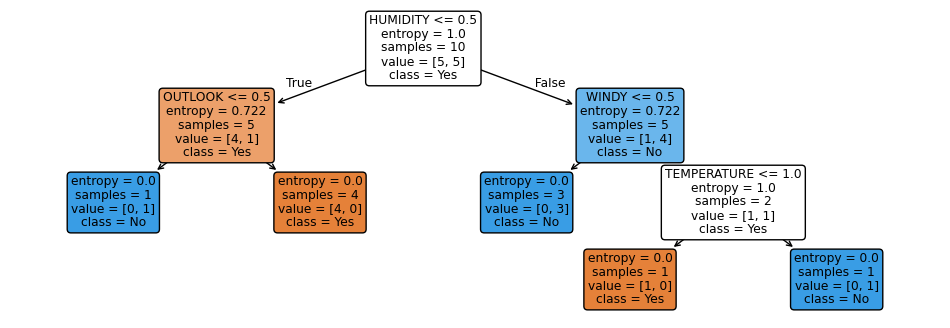

In [48]:
plt.figure(figsize=(12,4))
plot_tree(tree,
          feature_names=x.columns,
          class_names=["Yes","No"],
          filled=True,
          rounded=True)
plt.show()

# Model Evaluation Naive Bayes

In [49]:
print("Accuracy Score:",accuracy_score(ytest,naive_pred))
print("Precision Score:",precision_score(ytest,naive_pred))
print("Recall Score:",recall_score(ytest,naive_pred))
print("F1 Score:",f1_score(ytest,naive_pred))

Accuracy Score: 0.75
Precision Score: 1.0
Recall Score: 0.75
F1 Score: 0.8571428571428571


# Classification Report of Naive Bayes

In [50]:
print(classification_report(ytest,naive_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86         4

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Model Evaluation Random Forest

In [51]:
print("Accuracy Score:",accuracy_score(ytest,forest_pred))
print("Precision Score:",precision_score(ytest,forest_pred))
print("Recall Score:",recall_score(ytest,forest_pred))
print("F1 Score:",f1_score(ytest,forest_pred))

Accuracy Score: 0.5
Precision Score: 1.0
Recall Score: 0.5
F1 Score: 0.6666666666666666


# Classification Report of Random Forest

In [52]:
print(classification_report(ytest,forest_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         4

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
